# Topic Modeling - Reviews Infojobs

In [1]:
import pandas as pd

# read data
reviews_df = pd.read_csv("full_merge.csv", encoding="UTF-8")
reviews_df["is_bad_review"] = reviews_df["SCORE"].apply(lambda x: 1 if x < 3 else 0)
# select only relevant columns
reviews_df = reviews_df[["EMPRESA","DESCRIPTION", "is_bad_review"]]
reviews_df.head()

,EMPRESA,DESCRIPTION,is_bad_review
0,corteingles,Empresa que me ofrecio la primera oportunidad ...,0
1,corteingles,Empresa muy responsable con sus empleados nuev...,0
2,corteingles,"Buen ambiente de trabajo, trato al personal ex...",0
3,corteingles,Desde el minuto uno (proceso de seleccion y fo...,0
4,corteingles,Una gran empresa en todos los sectores,0


In [2]:
reviews_df = reviews_df[reviews_df['DESCRIPTION'].notnull()]

In [3]:
reviews_df.isnull().sum()

EMPRESA          0
DESCRIPTION      0
is_bad_review    0
dtype: int64

#### NLTK para limpiar el texto

In [4]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer


def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('spanish')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["DESCRIPTION"].apply(lambda x: clean_text(x))
#reviews_df

In [5]:
#quitar ultimos caracteres extraños manualmente
reviews_df["review_clean"] = reviews_df["review_clean"].apply(lambda x: 
x.replace("!", "").replace("?", "n").replace("Enter", "").replace("enter", "")
)

In [6]:
reviews_df['totalwords'] = reviews_df['review_clean'].str.split().str.len()

In [7]:
reviews_df = reviews_df.loc[reviews_df['totalwords'] >= 2]

In [8]:
reviews_df.head(3)

,EMPRESA,DESCRIPTION,is_bad_review,review_clean,totalwords
0,corteingles,Empresa que me ofrecio la primera oportunidad ...,0,empresa ofrecio primera oportunidad laboral tr...,9
1,corteingles,Empresa muy responsable con sus empleados nuev...,0,empresa responsable empleados nuevos trato est...,9
2,corteingles,"Buen ambiente de trabajo, trato al personal ex...",0,buen ambiente trabajo trato personal excepcion...,14


#### Spacy contiene un modelo en español

Aca el objetivos es lematizar para reducir la cantidad de palabras

In [21]:
!python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 37.4 MB 1.1 MB/s eta 0:00:011
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.0.0-py3-none-any.whl size=37405976 sha256=2c0ca8af9f58f8351bc31176e9a5b4908bf37bd05b26f5f19249a929dfec5860
  Stored in directory: /private/var/folders/f7/3ch4nts15cx5h7lw4wkrx7200000gp/T/pip-ephem-wheel-cache-7v1gfb8x/wheels/51/df/77/250d8a622c7fc066a42ea4238279337e4a5e04c2602c448ea5
Successfully built en-core-web-sm

    Linking successful
    /Users/cristobal.rojas/opt/anaconda3/envs/env_ml/lib/python3.7/site-packages/en_core_web_sm
    -->
    /Users/cristobal.rojas/opt/anaconda3/envs/env_ml/lib/python3.7/site-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')



In [23]:
!python3 -m spacy download es_core_news_sm

     |████████████████████████████████| 36.7 MB 2.6 MB/s eta 0:00:01
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.0.0-py3-none-any.whl size=36749070 sha256=654866335bc65a5994884c4f0c1eaa937d09a0b007f227d2f809f32e113845ea
  Stored in directory: /private/var/folders/f7/3ch4nts15cx5h7lw4wkrx7200000gp/T/pip-ephem-wheel-cache-qplfox0g/wheels/31/dc/46/07a9c57d10d6ae2bb8d282d99aef0a04addc3c88d9df75077f
Successfully built es-core-news-sm

    Linking successful
    /Users/cristobal.rojas/opt/anaconda3/envs/env_ml/lib/python3.7/site-packages/es_core_news_sm
    -->
    /Users/cristobal.rojas/opt/anaconda3/envs/env_ml/lib/python3.7/site-packages/spacy/data/es_core_news_sm

    You can now load the model via spacy.load('es_core_news_sm')



In [9]:
import re
import spacy
nlp = spacy.load('es_core_news_sm')
text = str(reviews_df)
doc = nlp(text)

def normalize_text(text):
    tm1 = re.sub('<pre>.*?</pre>', '', text, flags=re.DOTALL)
    tm2 = re.sub('<code>.*?</code>', '', tm1, flags=re.DOTALL)
    tm3 = re.sub('<[^>]+>©', '', tm1, flags=re.DOTALL)
    return tm3.replace("\n", "")

In [10]:
# in this step we are going to remove code syntax from text 
reviews_df['description_Cleaned_1'] = reviews_df['review_clean'].apply(normalize_text)
print('Before normalizing text-----\n')
print(reviews_df['review_clean'][2])
print('\nAfter normalizing text-----\n')
print(reviews_df['description_Cleaned_1'][2])

Before normalizing text-----

buen ambiente trabajo trato personal excepcional aprendiendo cogiendo buena experiencia contenta companeras gusta hago

After normalizing text-----

buen ambiente trabajo trato personal excepcional aprendiendo cogiendo buena experiencia contenta companeras gusta hago


In [12]:
#Lista creada con las stop de la libreria mas palabras vistas en el grafico final!
lista_stop=['trabajo','buen','bueno','buena','buenas','seria','gran','trabajar','bien',
            'ma','dia','experiencia','empresa','buenos','corte','ingles','gusto','siempre'
           ,'excelente','positivo','positiva','trabaja','aprendi','sido','laboral','empleados','personal'
           ,'persona','cliente','puesto','roja','cruz','mal','alli'] + stopwords.words('spanish')

In [11]:
lista_stop = stopwords.words('spanish')

In [12]:
punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~©'
# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    doc = nlp(docs, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok and tok not in punctuations]
    tokens = [tok for tok in tokens if tok and tok not in lista_stop] #linea a borrar si no funciona
    #tokens = [tok for tok in tokens if tok not in stop and tok not in punctuations]
    tokens = ' '.join(tokens)
    texts.append(tokens)
    return pd.Series(texts)
reviews_df['Description_Cleaned_2'] = reviews_df['description_Cleaned_1'].apply(lambda x: cleanup_text(x, False))
print('Reviews description with punctuatin and stopwords---\n')
print(reviews_df['description_Cleaned_1'][0])
print('\nReviews description after removing punctuation and stopwrods---\n')
print(reviews_df['Description_Cleaned_2'][0])

Reviews description with punctuatin and stopwords---

empresa ofrecio primera oportunidad laboral trato humano excelente agradecido

Reviews description after removing punctuation and stopwrods---

empresa ofrecio primero oportunidad laboral tratar humanar excelente agradecer


In [13]:
reviews_df['Description_Cleaned_2']= reviews_df['Description_Cleaned_2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [32]:
pip install image

     |████████████████████████████████| 2.2 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 7.5 MB 7.7 MB/s eta 0:00:01              | 3.0 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 15.2 MB/s eta 0:00:01
  Created wheel for image: filename=image-1.5.31-py2.py3-none-any.whl size=19472 sha256=2628817572861bc2a019ff84d4642fde05f270491886efb6c733aac2cc1a90bd
  Stored in directory: /Users/cristobal.rojas/Library/Caches/pip/wheels/09/21/3d/d9a06fda40387586027b9963b9558d6b655e0cde968737308f
Successfully built image
Note: you may need to restart the kernel to use updated packages.


In [14]:
from PIL import Image
import numpy as np
ij_mask = np.array(Image.open("imagen/mask-cloud.png"))
#ij_mask

In [ ]:
#si la imagen no tiene el fondo blanco 255 se debe cambiar si no no ejecutar este paso
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
    
transformed_ij_mask = np.ndarray((ij_mask.shape[0],ij_mask.shape[1]), np.int32)

for i in range(len(ij_mask)):
    transformed_ij_mask[i] = list(map(transform_format, ij_mask[i]))

In [35]:
pip install WordCloud

     |████████████████████████████████| 160 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 23.2 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 19.4 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 19.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Explorar visualmente la Data 

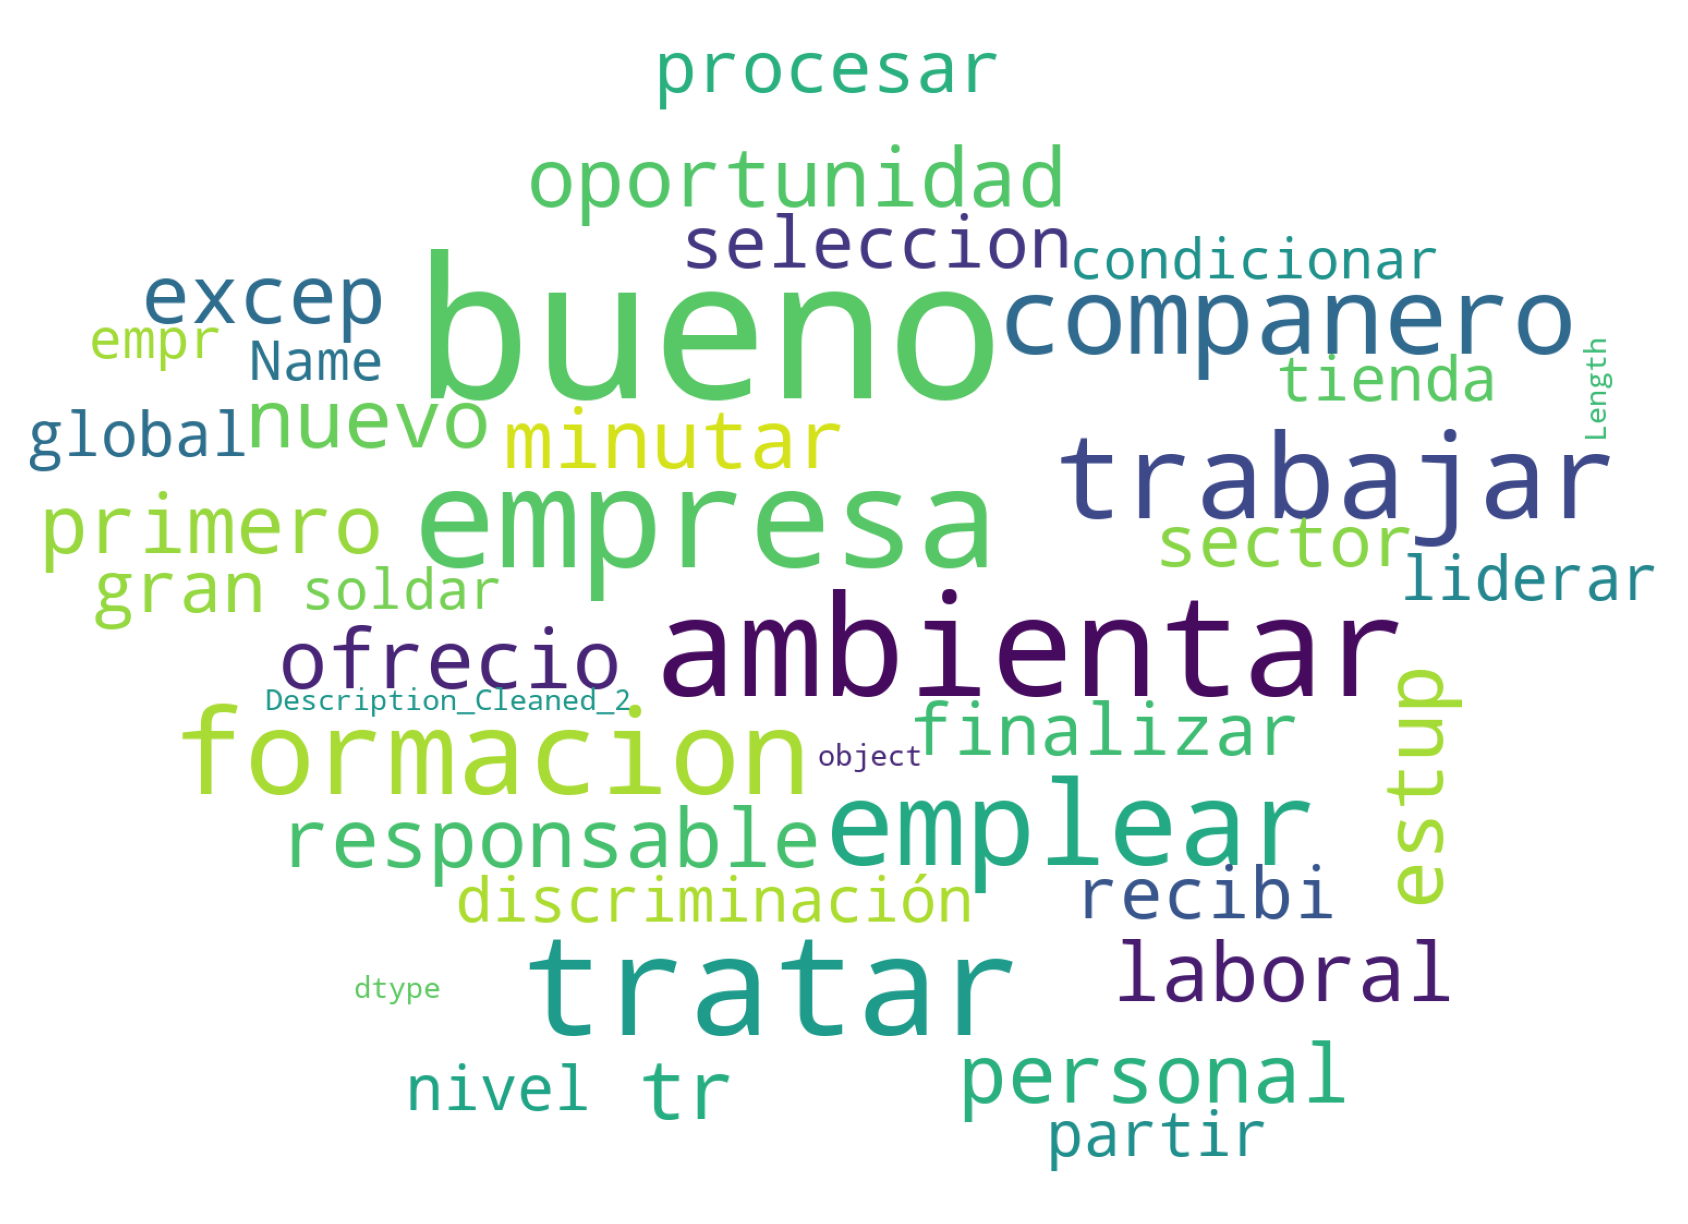

In [15]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        mask= ij_mask,
        max_words = 200,
        max_font_size = 60, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (30, 30))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud

show_wordcloud(reviews_df['Description_Cleaned_2'])

In [18]:
pip install sklearn

     |████████████████████████████████| 7.1 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 37.5 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 69.1 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=7d421a38a972a712351cc7ed3ea333fb076f952dafb74865e7485cb11d99de82
  Stored in directory: /Users/cristobal.rojas/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install seaborn

     |████████████████████████████████| 215 kB 2.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


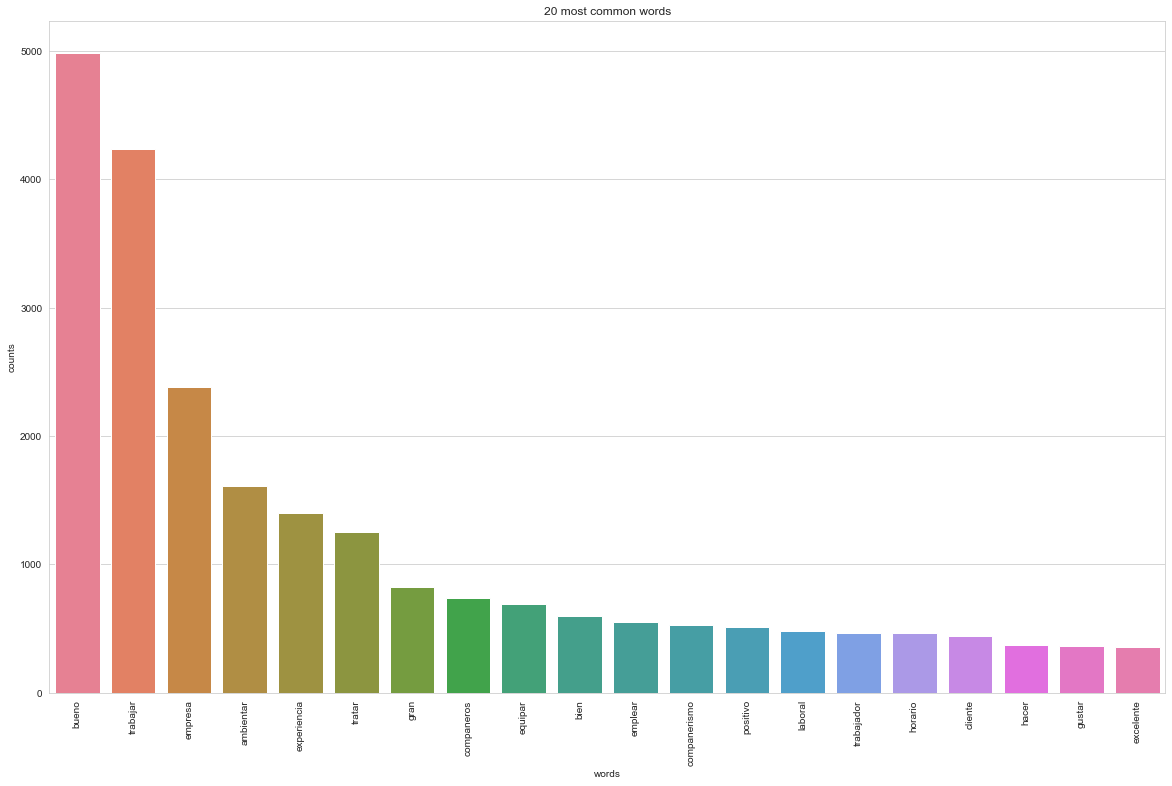

In [21]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#lista_stop=['trabajo','buen','bueno','buena','buenas','seria','gran','trabajar','bien',
#            'ma','dia','experiencia','empresa','buenos','corte','ingles','gusto','siempre'
#           ,'excelente','positivo','positiva','trabaja','aprendi','sido','laboral','empleados','personal'
#           ,'persona','cliente','puesto','roja','cruz','mal','alli'] + stopwords.words('spanish')


# Helper function
def plot_15_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(1, figsize=(20, 20/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=2.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=lista_stop)
#print (count_vectorizer)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(reviews_df['Description_Cleaned_2'])
#print(count_data)

#Visualise the X most common words

plot_15_most_common_words(count_data, count_vectorizer)

### Modelamiento para topics

### Topic v1

In [22]:

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 15
number_words = 5

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
trabajar hacer companeros poner aprender

Topic #1:
gran empresa trabajar equipar formar

Topic #2:
salariar hora pagar soldar horario

Topic #3:
bueno trabajar ambientar equipar companerismo

Topic #4:
experiencia bueno positivo aprendi laboral

Topic #5:
profesional ayudar experiencia personar rojo

Topic #6:
cliente atencion calidad venta servicio

Topic #7:
empresa desarrollar personal conocimiento emplear

Topic #8:
trabajar bien gustar empresa encantar

Topic #9:
positivo negativo aspecto siempre horario

Topic #10:
trabajar social practicar hacer realizar

Topic #11:
bueno tratar empresa companeros laboral

Topic #12:
empresa emplear malo trabajar genial

Topic #13:
empresa serio trabajador responsable valoracion

Topic #14:
empresa excelente oportunidad sector crecer


### Topic v2

In [23]:
doc_set = reviews_df['Description_Cleaned_2']

In [24]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [25]:
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in lista_stop]
    # add tokens to list
    texts.append(stopped_tokens)

In [27]:
pip install gensim

     |████████████████████████████████| 24.2 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 67.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 69.2 MB/s eta 0:00:01
     |████████████████████████████████| 128 kB 42.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.2 MB 67.1 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 547 kB 60.2 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.0.0-py3-none-any.whl size=101341 sha256=926c28406396581f4cc54e9c51a46f7b8a62d65fe96f66ed6c85968de0ac55f2
  Stored in directory: /Users/cristobal.rojas/Library/Caches/pip/wheels/bb/1c/9c/412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [28]:
from gensim import corpora, models

In [29]:
dictionary = corpora.Dictionary(texts)

In [30]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in texts]


elegir manualmente el numero de topics:

In [31]:
import gensim
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [32]:
lda_model.print_topics()

[(0,
  '0.078*"trabajador" + 0.070*"empresa" + 0.052*"excelente" + 0.044*"tratar" + 0.038*"companeros" + 0.025*"serio" + 0.021*"jefe" + 0.020*"responsable" + 0.019*"emplear" + 0.014*"relacion"'),
 (1,
  '0.037*"experiencia" + 0.025*"aprender" + 0.024*"cliente" + 0.024*"poder" + 0.022*"ayudar" + 0.017*"personar" + 0.017*"trabajar" + 0.016*"empresa" + 0.014*"atencion" + 0.014*"aprendi"'),
 (2,
  '0.055*"empresa" + 0.050*"emplear" + 0.046*"gran" + 0.036*"profesional" + 0.024*"personal" + 0.022*"equipar" + 0.021*"mejor" + 0.018*"formar" + 0.016*"formacion" + 0.016*"nivel"'),
 (3,
  '0.237*"trabajar" + 0.192*"bueno" + 0.136*"ambientar" + 0.049*"equipar" + 0.032*"companeros" + 0.016*"companerismo" + 0.014*"encantar" + 0.012*"agradable" + 0.009*"agusto" + 0.008*"horario"'),
 (4,
  '0.264*"bueno" + 0.123*"empresa" + 0.091*"experiencia" + 0.076*"tratar" + 0.041*"laboral" + 0.040*"gran" + 0.023*"companerismo" + 0.018*"condicionar" + 0.011*"organizacion" + 0.009*"conocimiento"'),
 (5,
  '0.081*"t

In [34]:
pip install pyLDAvis

Processing /Users/cristobal.rojas/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414/pyLDAvis-2.1.2-py2.py3-none-any.whl
     |████████████████████████████████| 548 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 38.7 MB/s eta 0:00:01
     |████████████████████████████████| 246 kB 32.4 MB/s eta 0:00:01
     |████████████████████████████████| 186 kB 59.6 MB/s eta 0:00:01
     |████████████████████████████████| 43 kB 6.9 MB/s  eta 0:00:01
     |████████████████████████████████| 83 kB 6.1 MB/s  eta 0:00:01
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=c7709f1194062cf4df7a7c18cd415c174d51abb6224a55d8819d9740fdb513e5
  Stored in directory: /Users/cristobal.rojas/Library/Caches/pip/wheels/3c/33/97/805b282e129f60bb4e87cea622338f30b65f21eaf65219971f
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=b37edad01dfed4146700e22bfd80be4962f3d589f259ec96a8461417d6ad643

### Topics de manera visual

In [35]:
from __future__ import division

import pyLDAvis.gensim
import pyLDAvis

pyLDAvis.enable_notebook()

In [36]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.048415 -0.172295       1        1  20.330570
3     -0.120470  0.294255       2        1  17.918249
4      0.185135  0.210225       3        1  14.553928
5     -0.254466 -0.085594       4        1  13.183692
2      0.241662 -0.109421       5        1  12.296130
6     -0.230546 -0.075945       6        1  11.374715
0      0.130270 -0.061226       7        1  10.342714, topic_info=            Term         Freq        Total Category  logprob  loglift
9          bueno  4388.000000  4388.000000  Default  30.0000  30.0000
26      trabajar  3866.000000  3866.000000  Default  29.0000  29.0000
16     ambientar  1475.000000  1475.000000  Default  28.0000  28.0000
1        empresa  2124.000000  2124.000000  Default  27.0000  27.0000
22   experiencia  1251.000000  1251.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
641       amable    44.179699    73.326271   Topic7  -4.9509   1.7622
11       emplear   119.111252   489.190247   Topic7  -3.9591   0.8562
36      positivo    70.620514   473.752899   Topic7  -4.4818   0.3655
492      valorar    46.133026   216.277206   Topic7  -4.9076   0.7239
153       partir    46.121223   218.557190   Topic7  -4.9079   0.7131

[369 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
515       2  0.972711    adaptacion
622       1  0.978480       adaptar
1773      3  0.976921        adecco
330       1  0.804560        ademar
330       6  0.177276        ademar
...     ...       ...           ...
297       5  0.983131         vivir
3680      5  0.947716  voluntariado
763       5  0.991012    voluntario
232       1  0.337371        volver
232       2  0.657873        volver

[406 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 6, 3, 7, 1])

Pertinencia
La relevancia se denota por λ, el peso asignado a la probabilidad de un término en un tema en relación con su elevación . Cuando λ = 1, los términos se clasifican por sus probabilidades dentro del tema (el método 'regular'), mientras que cuando λ = 0, los términos se clasifican solo por su elevación. La interfaz permite ajustar el valor de λ entre 0 y 1.

Los autores del artículo realizaron un estudio para determinar si había un valor óptimo para λ con respecto al uso de relevancia para ayudar a la interpretación del tema y encontraron que ese valor era 0.6, como se describe en la sección 3 de su artículo. En cualquier caso, es muy útil poder ajustar eso en cualquier momento.